<a href="https://colab.research.google.com/github/Yuliana2001/lab3_biosenales/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#la librería scipy sirve para cargar archivos con la extensión mat
contenido=io.loadmat('/content/drive/MyDrive/Laboratorio_bioseñales/Tercera_practica/signals.mat')
print(contenido)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


In [ ]:
#obtener las llaves para saber encontrar las posiciones de las señales
print(contenido.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


In [ ]:
contenido['ECG_asRecording'].shape

(1, 30720)

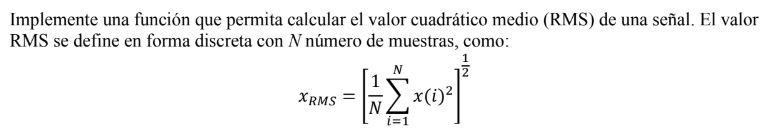

In [ ]:
#como único parámetro será el tipo de señal que se requiera
def valorCuadratico(signal):
  N=len(signal[0])
  Xrms=np.sqrt(np.sum(signal[0]**2)/N)
  return Xrms

In [ ]:
#PARA LA SEÑAL ECG
print(valorCuadratico(contenido['ECG_asRecording']))

4392.9682937490725


In [ ]:
contenido['ECG_asRecording'].shape

(1, 30720)

**A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.**


In [ ]:
Fs = contenido['Fs'][0][0]  # 1024 Hz
print("Frecuencia "+str(Fs))

tiempo1 = np.arange(len(contenido['ECG_asRecording'][0])) / Fs
tiempo2 = np.arange(len(contenido['ECG_filtered'][0])) / Fs
tiempo3 = np.arange(len(contenido['EMG_filtered1'][0])) / Fs
tiempo4 = np.arange(len(contenido['EMG_filtered2'][0])) / Fs
tiempo5 = np.arange(len(contenido['EMG_asRecording1'][0])) / Fs
tiempo6 = np.arange(len(contenido['EMG_asRecording2'][0])) / Fs
print("Primeros valores del vector de tiempo de las ECG:", tiempo1[:10])
print("Primeros valores del vector de tiempo de las ECG_filtered:", tiempo2[:10])
print("Primeros valores del vector de tiempo de las EMG1:", tiempo3[:10])
print("Primeros valores del vector de tiempo de las EMG2:", tiempo4[:10])
print("Primeros valores del vector de tiempo de las EMG_asRecording1:", tiempo5[:10])
print("Primeros valores del vector de tiempo de las EMG_asRecording2:", tiempo6[:10])


Frecuencia 1024
Primeros valores del vector de tiempo de las ECG: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las ECG_filtered: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG1: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG2: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG_asRecording1: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG_asRecording2: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.0

**Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.**

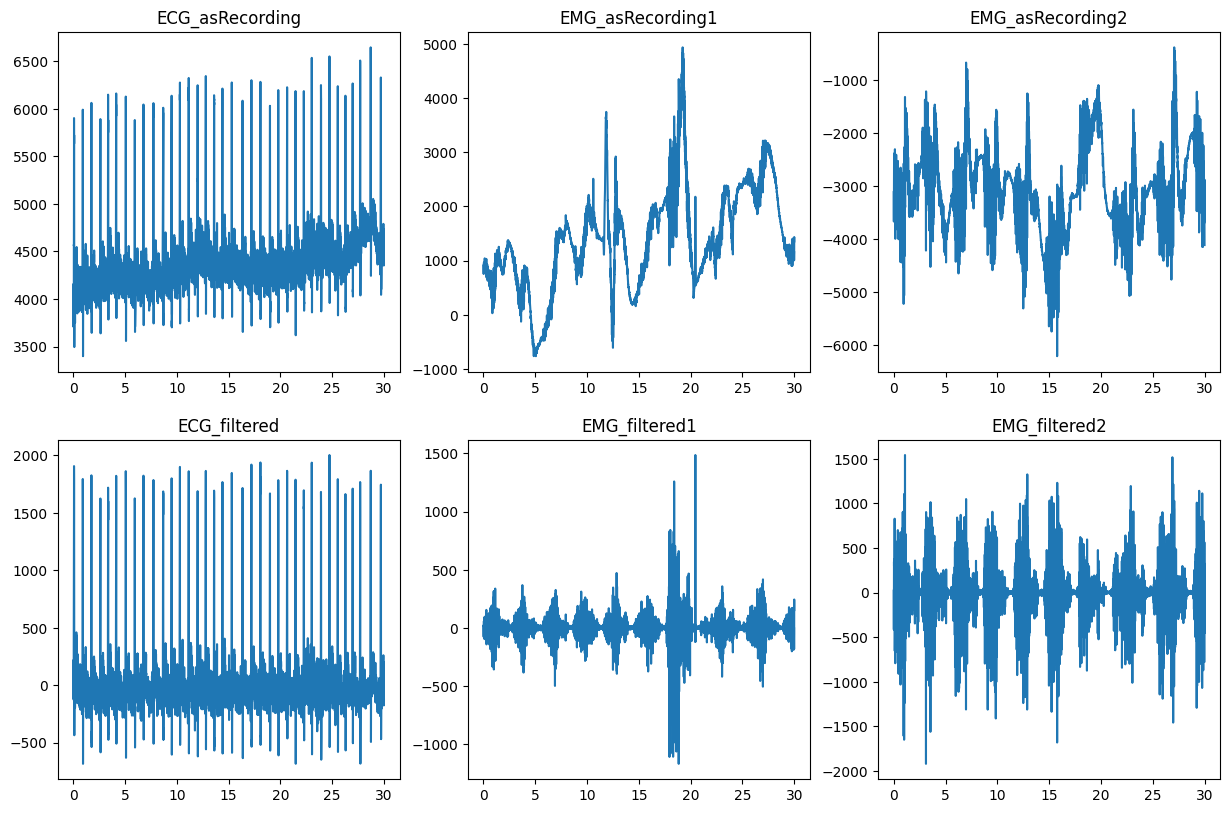

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.plot(tiempo1, contenido['ECG_asRecording'][0])
plt.title('ECG_asRecording')
plt.subplot(3,3,4)
plt.plot(tiempo2, contenido['ECG_filtered'][0])
plt.title('ECG_filtered')
plt.subplot(3,3,5)
plt.plot(tiempo3, contenido['EMG_filtered1'][0])
plt.title('EMG_filtered1')
plt.subplot(3,3,6)
plt.plot(tiempo4, contenido['EMG_filtered2'][0])
plt.title('EMG_filtered2')
plt.subplot(3,3,2)
plt.plot(tiempo5, contenido['EMG_asRecording1'][0])
plt.title('EMG_asRecording1')
plt.subplot(3,3,3)
plt.plot(tiempo6, contenido['EMG_asRecording2'][0])
plt.title('EMG_asRecording2')
plt.show()

**Análisis a partir de las gráficas**
---


> ECG

Probablemente se aplicó un filtro pasa bajos para eliminar el ruido de alta frecuencia y un filtro pasa altos para eliminar el componente DC, ya que se evidencia que la señal parece más centrada en torno a 0, indicando una posible eliminación del componente DC.


> EMG 1 y 2

Principalmente se observa bastante ruido, típico de señales EMG, pero ya filtradas se evidencia una redución del ruido de baja frecuencia y la línea base está más estable, por lo que se hace uso de un filtro pasa banda que eliminó tanto componentes de baja frecuencia como de alta frecuencia.







**Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el
promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**


In [ ]:
def estadisticas(ciclo):
    media = np.mean(ciclo)
    rms = np.sqrt(np.mean(ciclo**2))
    varianza = np.var(ciclo)
    desviacion = np.std(ciclo)
    return media, rms, varianza, desviacion

Duración del ciclo cardíaco: 0.49 segundos


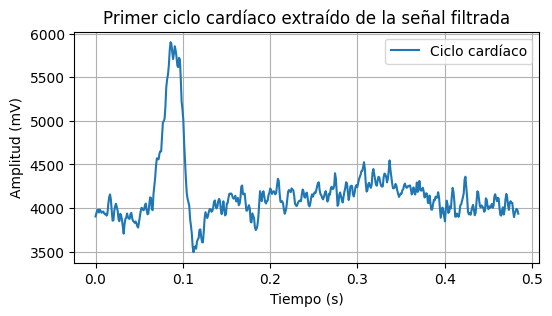

Media: 4162.6014
RMS: 4178.6456
Varianza: 133828.3071
Desviación estándar: 365.8255


In [ ]:
# para seleccionar un ciclo cardíaco se requiere hacer un análisis de la
# señal para obtener los picos QRS, para ello se hace del módulo de SciPy
# que es especializado en procesamiento de señales
from scipy.signal import find_peaks
# Simulación de señal ECG
ecg_signal = contenido['ECG_asRecording'][0]

# 2. Detección de picos R (ajustar umbral si hace falta)
# se elige 0.6, porque es simplemente un umbral para decir que quiero los picos
# que superen el 60% del valor máximo de la señal.
peaks, _ = find_peaks(ecg_signal, height=np.max(ecg_signal) * 0.6, distance=Fs//2)
ventana_antes = int(0.2 * Fs)  # 200 ms antes
ventana_despues = int(0.4 * Fs)  # 400 ms después

if len(peaks) > 1:
    r_index = peaks[0]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal))

    ciclo = ecg_signal[inicio:fin]
    tiempo_ciclo = tiempo1[inicio:fin]
    duracion_ciclo = (fin - inicio) / Fs
    print(f"Duración del ciclo cardíaco: {duracion_ciclo:.2f} segundos")

    plt.figure(figsize=(6, 3))
    plt.plot(tiempo_ciclo, ciclo, label="Ciclo cardíaco")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.title("Primer ciclo cardíaco extraído de la señal filtrada")
    plt.legend()
    plt.grid(True)
    plt.show()

    media, rms, varianza, desviacion=estadisticas(ciclo)

    print(f"Media: {media:.4f}")
    print(f"RMS: {rms:.4f}")
    print(f"Varianza: {varianza:.4f}")
    print(f"Desviación estándar: {desviacion:.4f}")
else:
    print("No se detectaron suficientes picos R para extraer un ciclo.")




**Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.**



Duración del ciclo cardíaco: 0.49 segundos


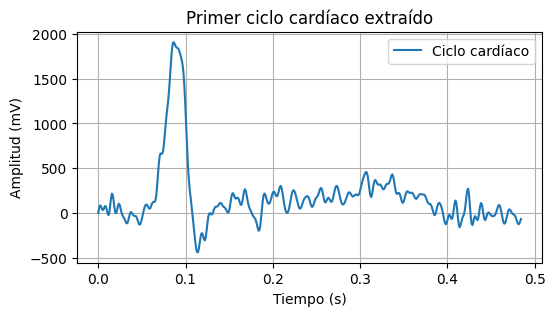

Media: 180.2678
RMS: 411.8226
Varianza: 137101.3482
Desviación estándar: 370.2720


In [ ]:
from scipy.signal import find_peaks
# Simulación de señal ECG
ecg_signal_filtered = contenido['ECG_filtered'][0]

# 2. Detección de picos R (ajustar umbral si hace falta)
# se elige 0.6, porque es simplemente un umbral para decir que quiero los picos
# que superen el 60% del valor máximo de la señal.
peaks, _ = find_peaks(ecg_signal_filtered, height=np.max(ecg_signal_filtered) * 0.6, distance=Fs//2)
ventana_antes = int(0.2 * Fs)  # 200 ms antes
ventana_despues = int(0.4 * Fs)  # 400 ms después

if len(peaks) > 1:
    r_index = peaks[0]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal_filtered))

    ciclo = ecg_signal_filtered[inicio:fin]
    tiempo_ciclo = tiempo1[inicio:fin]
    duracion_ciclo = (fin - inicio) / Fs
    print(f"Duración del ciclo cardíaco: {duracion_ciclo:.2f} segundos")

    plt.figure(figsize=(6, 3))
    plt.plot(tiempo_ciclo, ciclo, label="Ciclo cardíaco")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.title("Primer ciclo cardíaco extraído")
    plt.legend()
    plt.grid(True)
    plt.show()

    media, rms, varianza, desviacion=estadisticas(ciclo)

    print(f"Media: {media:.4f}")
    print(f"RMS: {rms:.4f}")
    print(f"Varianza: {varianza:.4f}")
    print(f"Desviación estándar: {desviacion:.4f}")
else:
    print("No se detectaron suficientes picos R para extraer un ciclo.")




**Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique
cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**

Ciclo 1: Media = 180.2678, Varianza = 137101.3482
Ciclo 2: Media = 30.2233, Varianza = 114297.3245
Ciclo 3: Media = 24.9233, Varianza = 109938.5826
Ciclo 4: Media = 14.9748, Varianza = 98744.5545
Ciclo 5: Media = 38.2113, Varianza = 100020.9063
Ciclo 6: Media = 36.8958, Varianza = 112180.6166
Ciclo 7: Media = 37.1123, Varianza = 115582.6885
Ciclo 8: Media = 27.8831, Varianza = 95438.4561
Ciclo 9: Media = 42.1313, Varianza = 109019.8147
Ciclo 10: Media = 53.1797, Varianza = 107056.8939
Ciclo 11: Media = 26.4407, Varianza = 99280.9363
Ciclo 12: Media = 22.9223, Varianza = 106876.5226
Ciclo 13: Media = 45.5328, Varianza = 116486.7888
Ciclo 14: Media = 23.9602, Varianza = 118600.6725
Ciclo 15: Media = 38.7334, Varianza = 100943.3444


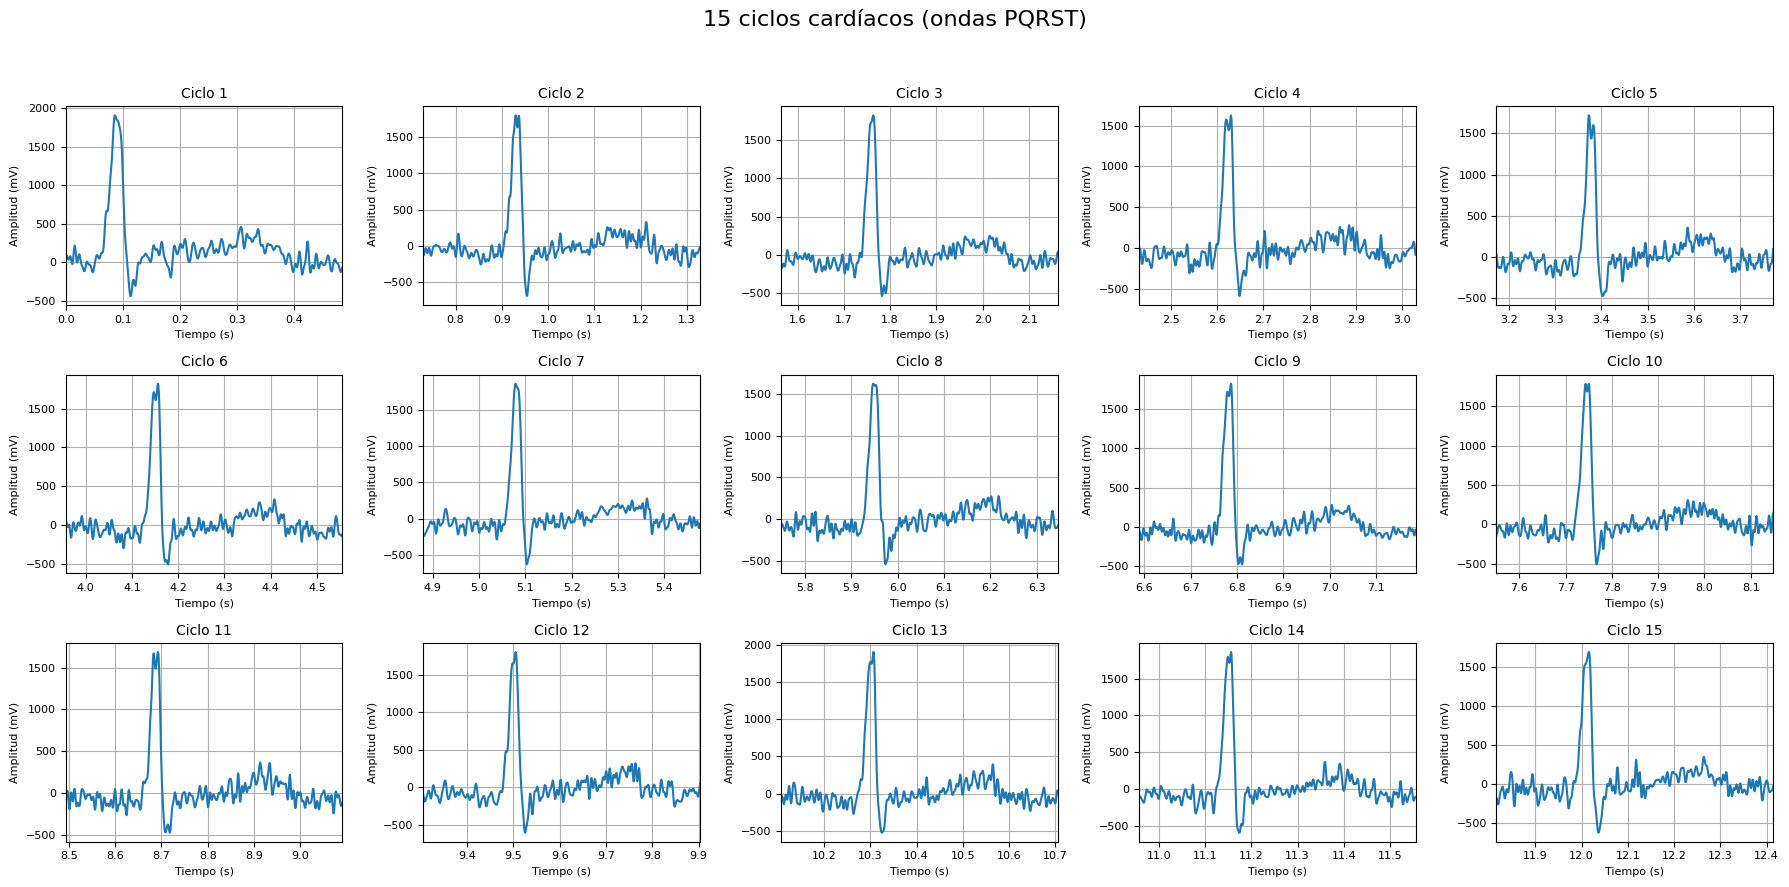

Lista de medias: [180.27, 30.22, 24.92, 14.97, 38.21, 36.9, 37.11, 27.88, 42.13, 53.18, 26.44, 22.92, 45.53, 23.96, 38.73]
Lista de varianzas: [137101.35, 114297.32, 109938.58, 98744.55, 100020.91, 112180.62, 115582.69, 95438.46, 109019.81, 107056.89, 99280.94, 106876.52, 116486.79, 118600.67, 100943.34]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Detectar picos R
peaks, _ = find_peaks(ecg_signal_filtered, height=np.max(ecg_signal_filtered) * 0.6, distance=Fs//2)

ventana_antes = int(0.2 * Fs)
ventana_despues = int(0.4 * Fs)

num_ciclos = min(15, len(peaks))  # se asegura que no se exceda el número de picos

fig, axs = plt.subplots(3, 5, figsize=(18, 9))
axs = axs.flatten()  # convertir a lista para iterar fácilmente
lista_media=[]
lista_varianza=[]
lista_ciclos=[]

for i in range(num_ciclos):
    r_index = peaks[i]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal_filtered))

    ciclo = ecg_signal_filtered[inicio:fin]
    lista_ciclos.append(ciclo)

    tiempo_ciclo = tiempo1[inicio:fin]

    axs[i].plot(tiempo_ciclo, ciclo)
    axs[i].set_title(f'Ciclo {i+1}', fontsize=10)
    axs[i].tick_params(labelsize=8)
    axs[i].grid(True)
    axs[i].set_xlim(tiempo_ciclo[0], tiempo_ciclo[-1])
    axs[i].set_xlabel("Tiempo (s)", fontsize=8)
    axs[i].set_ylabel("Amplitud (mV)", fontsize=8)

    media_filt, _, varianza_filt, _=estadisticas(ciclo)
    lista_media.append(float(round(media_filt, 2)))
    lista_varianza.append(float(round(varianza_filt, 2)))


    print(f"Ciclo {i+1}: Media = {media_filt:.4f}, Varianza = {varianza_filt:.4f}")

fig.suptitle("15 ciclos cardíacos (ondas PQRST)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print("Lista de medias:", lista_media)
print("Lista de varianzas:", lista_varianza)


**Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico
(prueba U de Mann-Whitney).**

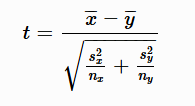

In [3]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

In [ ]:
#se compara el ciclo 1 y 2
from scipy.stats import shapiro
#Verificar normalidad
# La prueba de Shapiro-Wilk es un método formal para verificar si una muestra
# de datos proviene de una distribución normal
stat1, p1 = shapiro(lista_ciclos[0])
stat2, p2 = shapiro(lista_ciclos[1])

print(f"Shapiro ciclo 1: p={p1:.4f}")
print(f"Shapiro ciclo 2: p={p2:.4f}")
if p1 > 0.05:
    print("El ciclo 1 parece seguir una distribución normal.")
else:
    print("El ciclo 1 no parece seguir una distribución normal.")

if p2 > 0.05:
    print("El ciclo 2 parece seguir una distribución normal.")
else:
    print("El ciclo 2 no parece seguir una distribución normal.")

Shapiro ciclo 1: p=0.0000
Shapiro ciclo 2: p=0.0000
El ciclo 1 no parece seguir una distribución normal.
El ciclo 2 no parece seguir una distribución normal.


In [ ]:
from scipy.stats import levene
#para verificar homocedasticidad
stat_levene, p_levene = levene(lista_ciclos[0], lista_ciclos[1])

print(f"Prueba de Levene: p={p_levene:.4f}")


Prueba de Levene: p=0.0878


In [ ]:
import pingouin as pg
#se realiza prueba T entre el ciclo 1 y 2
resultado_t = pg.ttest(lista_ciclos[0], lista_ciclos[1], correction=False)
print(resultado_t)


               T   dof alternative         p-val             CI95%   cohen-d  \
T-test  7.038456  1108   two-sided  3.401115e-12  [108.22, 191.87]  0.424845   

             BF10  power  
T-test  1.709e+09    1.0  


In [ ]:
#se compara para el ciclo 2 y 3
from scipy.stats import shapiro
#Verificar normalidad
# La prueba de Shapiro-Wilk es un método formal para verificar si una muestra
# de datos proviene de una distribución normal
stat1, p3 = shapiro(lista_ciclos[1])
stat2, p4 = shapiro(lista_ciclos[2])

print(f"Shapiro ciclo 1: p={p3:.4f}")
print(f"Shapiro ciclo 2: p={p4:.4f}")
if p1 > 0.05:
    print("El ciclo 2 parece seguir una distribución normal.")
else:
    print("El ciclo 2 no parece seguir una distribución normal.")

if p2 > 0.05:
    print("El ciclo 3 parece seguir una distribución normal.")
else:
    print("El ciclo 3 no parece seguir una distribución normal.")

Shapiro ciclo 1: p=0.0000
Shapiro ciclo 2: p=0.0000
El ciclo 2 no parece seguir una distribución normal.
El ciclo 3 no parece seguir una distribución normal.


In [ ]:
from scipy.stats import levene
#para verificar homocedasticidad
stat_levene, p_levene = levene(lista_ciclos[1], lista_ciclos[2])

print(f"Prueba de Levene: p={p_levene:.4f}")


Prueba de Levene: p=0.7608


In [ ]:
import pingouin as pg
#se realiza prueba T entre el ciclo 1 y 2
resultado_t = pg.ttest(lista_ciclos[1], lista_ciclos[2], correction=False)
print(resultado_t)


               T   dof alternative     p-val            CI95%   cohen-d  \
T-test  0.276883  1224   two-sided  0.781917  [-32.25, 42.85]  0.015815   

         BF10     power  
T-test  0.067  0.058814  


In [ ]:
from scipy.stats import mannwhitneyu
#Para ciclo 1 y 2
stat_mwu, p_mwu = mannwhitneyu(lista_ciclos[0], lista_ciclos[1])
print(f"Prueba U de Mann-Whitney: p={p_mwu:.4f}")


Prueba U de Mann-Whitney: p=0.0000


In [ ]:
from scipy.stats import mannwhitneyu
#Para ciclo 2 y 3
stat_mwu, p_mwu = mannwhitneyu(lista_ciclos[1], lista_ciclos[2])
print(f"Prueba U de Mann-Whitney: p={p_mwu:.4f}")


Prueba U de Mann-Whitney: p=0.6574


**Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal(Estacionariedad)**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar prueba Dickey-Fuller a la señal ECG completa o una sección larga
resultado_adf = adfuller(ecg_signal_filtered)

print("Resultados prueba Dickey-Fuller:")
print(f"ADF Statistic: {resultado_adf[0]:.4f}")
print(f"p-value: {resultado_adf[1]:.4f}")
for key, value in resultado_adf[4].items():
    print(f"Valor crítico {key}: {value:.4f}")


Resultados prueba Dickey-Fuller:
ADF Statistic: -24.1341
p-value: 0.0000
Valor crítico 1%: -3.4306
Valor crítico 5%: -2.8616
Valor crítico 10%: -2.5668


# PARTE 2


In [53]:
from scipy import io
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu
import pingouin as pg

partsEnergycontrolcolum = []
energyMeancontrolcolumn = []
valueColumncontrol =  np.array([], dtype=int)
dataFrameControl = {'Canal':[], 'Sujeto':[], 'Energia':[]}

partsEnergyparkinsoncolum = []
energyMeanparkinsoncolumn = []
valueColumnparkinson =  np.array([], dtype=int)
dataFrameParkinson = {'Canal':[], 'Sujeto':[], 'Energia':[]}

**Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal**


In [54]:
energyControl = []
nameDirectionsControl = os.path.abspath('/content/drive/MyDrive/Laboratorio_bioseñales/datos_senales_datos_parkinson_cursos/control') # Reta de la carpeta 'control'
filesControl = os.listdir(nameDirectionsControl) # Nombres de los archivos de la carpeta 'control'
for fileControl in filesControl:
   controlData = io.loadmat(nameDirectionsControl + '/'+ fileControl)
   controlStudydata = controlData['data']

   for c in np.arange(0, controlStudydata.shape[0]):
       matrixControl = controlStudydata[c]
       energyMean = np.sum(matrixControl**2) / matrixControl.size
       energyControl = np.append(energyControl, energyMean)

partsEnergycontrol = energyControl.reshape(36, 8)
counterSubjectControl = 1
counterEnergyControl = 0

for e in partsEnergycontrol:
   print('\n'+ 'Sujeto número: ' + str(counterSubjectControl) +'\n')
   for g in np.arange(0,e.shape[0]):
       print('Canal ' + str(g + 1) + ': ' + str(e[g]))
   counterSubjectControl = counterSubjectControl + 1



# Se sabe que shape de todos los archivos es: shape = [8,2000,184], lo que significa que hay 8 matrices las cuales corresponden
# los acanales o electrodos, cada matriz contiene 2000 filas con 184 columnas, entonces se conoce que por cada epocoa se registraron
# 2000 datos de ocho canales.




Sujeto número: 1

Canal 1: 7.074336660820593
Canal 2: 9.14199983287185
Canal 3: 14.374966074086649
Canal 4: 7.135363455286241
Canal 5: 14.393722989149223
Canal 6: 7.3307088697825655
Canal 7: 7.970077047475804
Canal 8: 9.749949327864464

Sujeto número: 2

Canal 1: 7.983201434175274
Canal 2: 8.808905124111357
Canal 3: 10.402468564316822
Canal 4: 9.827200008606384
Canal 5: 8.339491031529256
Canal 6: 46.94702450467098
Canal 7: 33.43124813764692
Canal 8: 37.842562935831396

Sujeto número: 3

Canal 1: 10.732825179081159
Canal 2: 10.49295395601041
Canal 3: 11.38007479412437
Canal 4: 9.25282014181638
Canal 5: 14.865081512905078
Canal 6: 12.622079036278844
Canal 7: 11.390663793654475
Canal 8: 12.329299755832064

Sujeto número: 4

Canal 1: 14.275562032451463
Canal 2: 13.102419626758033
Canal 3: 8.691999477964323
Canal 4: 8.622302966325064
Canal 5: 13.103186211223345
Canal 6: 41.68530920375937
Canal 7: 25.560552861105343
Canal 8: 33.92617412775772

Sujeto número: 5

Canal 1: 9.255414989521693
Ca

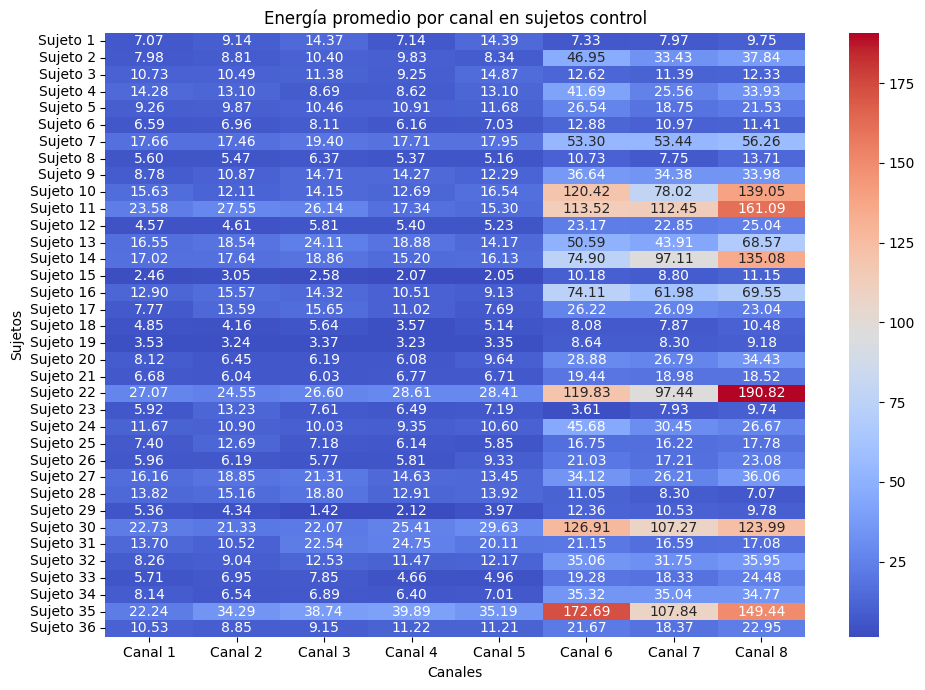

In [55]:
plt.figure(figsize=(10, 7))
sns.heatmap(partsEnergycontrol, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f'Canal {i+1}' for i in range(8)],
            yticklabels=[f'Sujeto {i+1}' for i in range(36)])
plt.title('Energía promedio por canal en sujetos control')
plt.xlabel('Canales')
plt.ylabel('Sujetos')
plt.tight_layout()
plt.savefig('heatmap_control.png')
plt.show()


In [56]:
# Inicializamos arreglo para almacenar la energía promedio de cada canal de Parkinson
energyParkinson = []

# Ruta de la carpeta 'parkinson'
nameDirectionsParkinson = os.path.abspath('/content/drive/MyDrive/Laboratorio_bioseñales/datos_senales_datos_parkinson_cursos/parkinson')
filesParkinson = os.listdir(nameDirectionsParkinson)  # Nombres de los archivos de la carpeta 'parkinson'

# Procesamos cada archivo de la carpeta Parkinson
for fileParkinson in filesParkinson:
    # Carga del archivo MAT completo, construyendo la ruta completa:
    file_path = os.path.join(nameDirectionsParkinson, fileParkinson)
    parkinsonData = io.loadmat(file_path)

    # Se asume que la señal se encuentra en la variable 'data'
    if 'data' not in parkinsonData:
        print(f"El archivo {fileParkinson} no contiene la variable 'data'.")
        continue

    parkinsonStudydata = parkinsonData['data']

    # Para cada canal (o, alternativamente, para cada elemento de la señal según su primer eje)
    for c in np.arange(0, parkinsonStudydata.shape[0]):
        matrixParkinson = parkinsonStudydata[c]
        # Calcular la energía promedio de la matriz (sección de la señal)
        energyMean = np.sum(matrixParkinson**2) / matrixParkinson.size
        # Acumulamos el valor
        energyParkinson = np.append(energyParkinson, energyMean)

# Ajustar la forma del arreglo:
# En el ejemplo de control se usó reshape(36, 8);
# en Parkinson ajusta según corresponda, por ejemplo: reshape(23, 8) para 23 sujetos con 8 canales cada uno.
partsEnergyParkinson = energyParkinson.reshape(23, 8)

# Imprimir los resultados con un bucle similar al de control
counterSubjectParkinson = 1
for e in partsEnergyParkinson:
    print('\n' + 'Sujeto número: ' + str(counterSubjectParkinson) + '\n')
    for g in np.arange(0, e.shape[0]):
        print('Canal ' + str(g + 1) + ': ' + str(e[g]))
    counterSubjectParkinson += 1


Sujeto número: 1

Canal 1: 8.997830028832402
Canal 2: 6.0008009107385725
Canal 3: 6.143172199922925
Canal 4: 7.392954141961285
Canal 5: 8.52921658053574
Canal 6: 31.99172465896632
Canal 7: 26.85773038621157
Canal 8: 33.201819739562964

Sujeto número: 2

Canal 1: 11.871162805930613
Canal 2: 11.035003784282445
Canal 3: 12.270157806043413
Canal 4: 10.901968223753396
Canal 5: 11.29716987266947
Canal 6: 64.15713240239363
Canal 7: 64.44424281664867
Canal 8: 76.39964212386333

Sujeto número: 3

Canal 1: 6.219121785183239
Canal 2: 5.630587900142893
Canal 3: 5.409817387452343
Canal 4: 4.744892231151254
Canal 5: 6.045530472403712
Canal 6: 11.399106731442155
Canal 7: 11.850310174649861
Canal 8: 12.80303267015999

Sujeto número: 4

Canal 1: 19.046051287076562
Canal 2: 21.787689728503285
Canal 3: 20.989997399654232
Canal 4: 20.85764399486118
Canal 5: 23.256868522703694
Canal 6: 125.82469735454109
Canal 7: 89.67271924424102
Canal 8: 131.18059020523035

Sujeto número: 5

Canal 1: 5.346474111688109
C

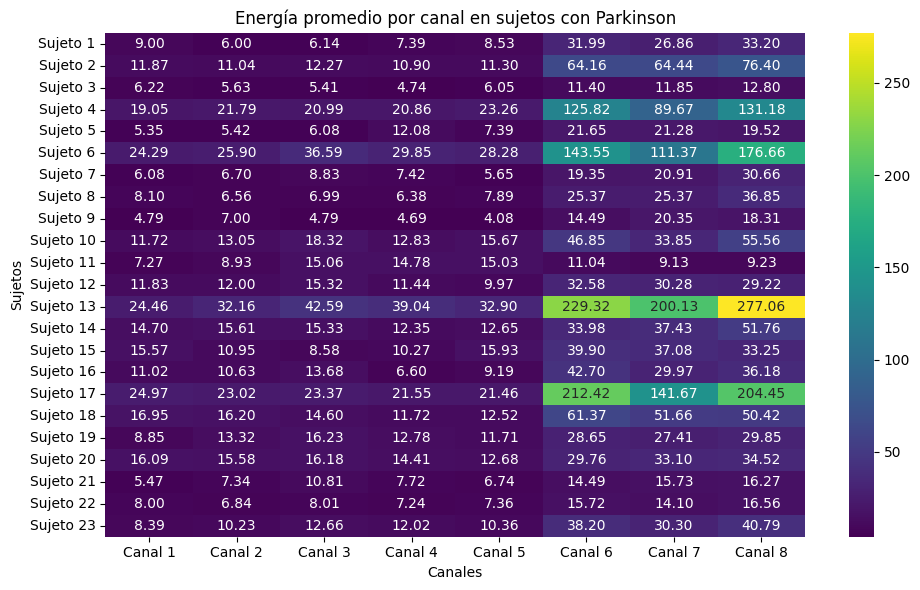

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(partsEnergyParkinson, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=[f'Canal {i+1}' for i in range(8)],
            yticklabels=[f'Sujeto {i+1}' for i in range(23)])
plt.title('Energía promedio por canal en sujetos con Parkinson')
plt.xlabel('Canales')
plt.ylabel('Sujetos')
plt.tight_layout()
plt.savefig('heatmap_parkinson.png')
plt.show()



**Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta
información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para
cada grupo poblacional.**


In [58]:
counterControlsubject = 1

nameDirectionsControl = os.path.abspath('/content/drive/MyDrive/Laboratorio_bioseñales/datos_senales_datos_parkinson_cursos/control') # Reta de la carpeta 'control'
filesControl = os.listdir(nameDirectionsControl) # Nombres de los archivos de la carpeta 'control'

for fileControl in filesControl:
    controlData = io.loadmat(nameDirectionsControl + '/'+ fileControl)
    controlStudydata = controlData['data']
    counterControlsubject = counterControlsubject + 1

    for c in np.arange(0, controlStudydata.shape[0]):
        matrixControl = controlStudydata[c]
        valueColumncontrol = np.append(valueColumncontrol, matrixControl.shape[1])

        for o in np.arange(0,matrixControl.shape[1]):

            columnControl = matrixControl[:,o]
            energyControlcolumn = np.sum(columnControl**2)/columnControl.size
            energyMeancontrolcolumn = np.append(energyMeancontrolcolumn, energyControlcolumn)

partsControlages = np.split(energyMeancontrolcolumn, np.cumsum(valueColumncontrol)[:-1])

for sum in np.arange(0, len(partsControlages)):
    sumEnergycontrol = np.mean(partsControlages[sum])
    #print(sumEnergycontrol.shape)
    dataFrameControl['Energia'].append(sumEnergycontrol)

for ib in range(1, counterControlsubject):
    for jx in range(1, controlStudydata.shape[0]+1):
        dataFrameControl['Canal'].append(jx)
        dataFrameControl['Sujeto'].append(ib)

#for clave, valor in dataFrameControl.items():
    #print(f"La clave '{clave}' tiene {len(valor)} elementos.")

fileDataframeControl = pd.DataFrame(dataFrameControl)
print(fileDataframeControl)

counterParkinsonsubject = 1
nameDirectionsParkinson = os.path.abspath('/content/drive/MyDrive/Laboratorio_bioseñales/datos_senales_datos_parkinson_cursos/parkinson')
filesParkinson = os.listdir(nameDirectionsParkinson)

for fileParkinson in filesParkinson:
    parkinsonData = io.loadmat(nameDirectionsParkinson + '/' + fileParkinson)
    parkinsonStudydata = parkinsonData['data']
    counterParkinsonsubject = counterParkinsonsubject + 1

    for q in np.arange(0, parkinsonStudydata.shape[0]):
        matrixParkinson = parkinsonStudydata[q]
        valueColumnparkinson = np.append(valueColumnparkinson, matrixParkinson.shape[1])

        for w in np.arange(0,matrixParkinson.shape[1]):

            columnParkinson = matrixParkinson[:,w]
            energyParkinsoncolumn = np.sum(columnParkinson**2)/columnParkinson.size
            energyMeanparkinsoncolumn = np.append(energyMeanparkinsoncolumn, energyParkinsoncolumn)


partsParkinsonages = np.split(energyMeanparkinsoncolumn, np.cumsum(valueColumnparkinson)[:-1])
print("parkinson")
for sum in np.arange(0, len(partsParkinsonages)):
    sumEnergyparkinson = np.mean(partsParkinsonages[sum])
    #print(sumEnergycontrol.shape)
    dataFrameParkinson['Energia'].append(sumEnergyparkinson)

for ib in range(1, counterParkinsonsubject):
    for jx in range(1, parkinsonStudydata.shape[0]+1):
        dataFrameParkinson['Canal'].append(jx)
        dataFrameParkinson['Sujeto'].append(ib)

#for clave, valor in dataFrameParkinson.items():
    #print(f"La clave '{clave}' tiene {len(valor)} elementos.")

fileDataframeParkinson = pd.DataFrame(dataFrameParkinson)
print(fileDataframeParkinson)




     Canal  Sujeto    Energia
0        1       1   7.074337
1        2       1   9.142000
2        3       1  14.374966
3        4       1   7.135363
4        5       1  14.393723
..     ...     ...        ...
283      4      36  11.219222
284      5      36  11.207560
285      6      36  21.672296
286      7      36  18.365906
287      8      36  22.945410

[288 rows x 3 columns]
parkinson
     Canal  Sujeto    Energia
0        1       1   8.997830
1        2       1   6.000801
2        3       1   6.143172
3        4       1   7.392954
4        5       1   8.529217
..     ...     ...        ...
179      4      23  12.018236
180      5      23  10.361866
181      6      23  38.195678
182      7      23  30.299565
183      8      23  40.792706

[184 rows x 3 columns]


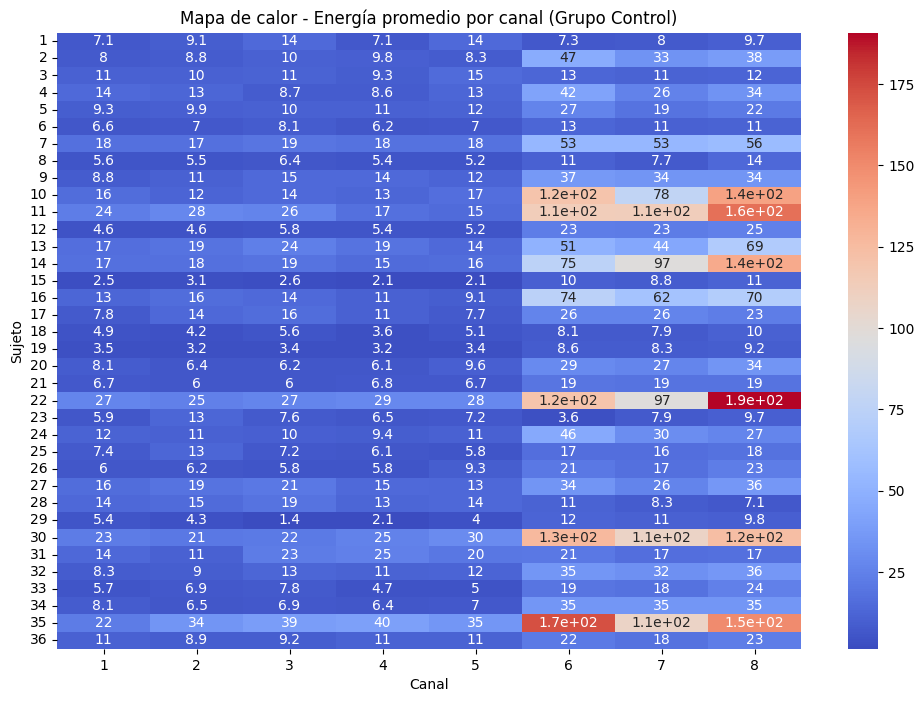

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_control = fileDataframeControl.pivot(index='Sujeto', columns='Canal', values='Energia')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_control, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - Energía promedio por canal (Grupo Control)')
plt.ylabel('Sujeto')
plt.xlabel('Canal')
plt.show()


**Determine si existe diferencia estadística entre canales de cada grupo de sujetos a través de una prueba t. Compruebe los
supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen
diferencias entre los canales entre grupos de sujetos. De no cumplirse los requisitos, realice entonces un análisis no paramétrico
(prueba U de Mann-Whitney). Este numeral tiene como objetivo identificar los canales que entregan información diferencial entre pacientes
Sanos y con enfermedad de Parkinson.**

In [60]:
#Verificar normalidad



# Convertir a array si es una Serie de pandas
energyVectorSh = fileDataframeControl['Energia'].values
energyVectorShP = fileDataframeParkinson['Energia'].values

partsenergyVectorSh = energyVectorSh.reshape(36, 8)
partsenergyVectorShP = energyVectorShP.reshape(23, 8)

# Aplicar Shapiro-Wilk a cada grupo
print("Prueba de shapiro de control:")

for i, sh in enumerate(partsenergyVectorSh):
    testShapiro = shapiro(sh)
    print(f"\n Sujeto {i+1}: p-value = {testShapiro.pvalue}")

    if testShapiro.pvalue > 0.05:
        print(f"\n Sujeto {i+1} parece seguir una distribución normal.")
    else:
        print(f"\n Sujeto {i+1} no parece seguir una distribución normal.")

print("Prueba de shapiro de parkinson:")

for i, shp in enumerate(partsenergyVectorShP):
    testShapiroP = shapiro(shp)
    print(f"\n Sujeto {i+1}: p-value = {testShapiroP.pvalue}")

    if testShapiroP.pvalue > 0.05:
        print(f"\n Sujeto {i+1} parece seguir una distribución normal.")
    else:
        print(f"\n Sujeto {i+1} no parece seguir una distribución normal.")

min_filas = min(partsenergyVectorSh.shape[0], partsenergyVectorShP.shape[0])

for lv in range(min_filas):
    filaControllv = partsenergyVectorSh[lv]
    filaParkinsonlv = partsenergyVectorShP[lv]

    testLevene = levene(filaControllv, filaParkinsonlv)

    print(f'\nSujeto {lv+1} Prueba de Levene: p= {testLevene.pvalue}')


for t in range(min_filas):
    filaControlt = partsenergyVectorSh[t]
    filaParkinsont = partsenergyVectorShP[t]

    testt = pg.ttest(filaControlt, filaParkinsont, correction=False)

    t_valor = testt['T'].values[0]
    p_valor = testt['p-val'].values[0]

    print(f"\nSujeto {t+1}: t = {t_valor}, p = {p_valor}")

for mnn in range(min_filas):

    filaControlt = partsenergyVectorSh[mnn]
    filaParkinsont = partsenergyVectorShP[mnn]

    stat_mwu, p_mwu = mannwhitneyu(filaControlt, filaParkinsont, alternative='two-sided')

    print(f"\nSujeto {mnn+1}: U = {stat_mwu}, p = {p_mwu}")




Prueba de shapiro de control:

 Sujeto 1: p-value = 0.019376208249627255

 Sujeto 1 no parece seguir una distribución normal.

 Sujeto 2: p-value = 0.010684228993027924

 Sujeto 2 no parece seguir una distribución normal.

 Sujeto 3: p-value = 0.7617899910163333

 Sujeto 3 parece seguir una distribución normal.

 Sujeto 4: p-value = 0.08726400079309206

 Sujeto 4 parece seguir una distribución normal.

 Sujeto 5: p-value = 0.04958528491088712

 Sujeto 5 no parece seguir una distribución normal.

 Sujeto 6: p-value = 0.11679420973564186

 Sujeto 6 parece seguir una distribución normal.

 Sujeto 7: p-value = 0.0014038478773534054

 Sujeto 7 no parece seguir una distribución normal.

 Sujeto 8: p-value = 0.019585786360793934

 Sujeto 8 no parece seguir una distribución normal.

 Sujeto 9: p-value = 0.0208140372873942

 Sujeto 9 no parece seguir una distribución normal.

 Sujeto 10: p-value = 0.006780792150308556

 Sujeto 10 no parece seguir una distribución normal.

 Sujeto 11: p-value = 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, mannwhitneyu
import pingouin as pg

def guardar_tabla_como_imagen(df, titulo, nombre_archivo):
    fig, ax = plt.subplots(figsize=(10, 1 + 0.3 * len(df)))
    ax.axis('off')
    tabla = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellLoc='center',
                     loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(9)
    tabla.scale(1, 1.3)
    plt.title(titulo, fontsize=12, weight='bold', pad=10)
    plt.tight_layout()
    plt.savefig(nombre_archivo, dpi=300)
    plt.close()

# Inicializar contenedores
shapiro_control = {}
shapiro_parkinson = {}
levene_results = {}
t_test_results = {}
mannwhitney_results = {}

min_filas = min(partsenergyVectorSh.shape[0], partsenergyVectorShP.shape[0])
sujetos = [f'Sujeto {i+1}' for i in range(min_filas)]

for i in range(min_filas):
    fila_control = partsenergyVectorSh[i]
    fila_parkinson = partsenergyVectorShP[i]

    # Shapiro
    testShapiro = shapiro(fila_control)
    testShapiroP = shapiro(fila_parkinson)
    shapiro_control[sujetos[i]] = testShapiro.pvalue
    shapiro_parkinson[sujetos[i]] = testShapiroP.pvalue

    # Levene
    testLevene = levene(fila_control, fila_parkinson)
    levene_results[sujetos[i]] = testLevene.pvalue

    # T-test
    testt = pg.ttest(fila_control, fila_parkinson, correction=False)
    t_valor = testt['T'].values[0]
    p_valor = testt['p-val'].values[0]
    t_test_results[sujetos[i]] = (t_valor, p_valor)

    # Mann-Whitney
    stat_mwu, p_mwu = mannwhitneyu(fila_control, fila_parkinson, alternative='two-sided')
    mannwhitney_results[sujetos[i]] = (stat_mwu, p_mwu)

# DataFrames
df_shapiro_control = pd.DataFrame({
    'p-value': list(shapiro_control.values()),
    'Normalidad': ['Sí' if p > 0.05 else 'No' for p in shapiro_control.values()]
}, index=sujetos)

df_shapiro_parkinson = pd.DataFrame({
    'p-value': list(shapiro_parkinson.values()),
    'Normalidad': ['Sí' if p > 0.05 else 'No' for p in shapiro_parkinson.values()]
}, index=sujetos)

df_levene = pd.DataFrame({
    'p-value': list(levene_results.values()),
    'Varianzas iguales': ['Sí' if p > 0.05 else 'No' for p in levene_results.values()]
}, index=sujetos)

df_ttest = pd.DataFrame(t_test_results).T
df_ttest.columns = ['t', 'p-value']
df_ttest['Significativo'] = ['Sí' if p < 0.05 else 'No' for p in df_ttest['p-value']]
df_ttest.index = sujetos

df_mannwhitney = pd.DataFrame(mannwhitney_results).T
df_mannwhitney.columns = ['U', 'p-value']
df_mannwhitney['Significativo'] = ['Sí' if p < 0.05 else 'No' for p in df_mannwhitney['p-value']]
df_mannwhitney.index = sujetos

# Guardar como imágenes
guardar_tabla_como_imagen(df_shapiro_control, "Prueba de Shapiro - Grupo Control", "shapiro_control.png")
guardar_tabla_como_imagen(df_shapiro_parkinson, "Prueba de Shapiro - Grupo Parkinson", "shapiro_parkinson.png")
guardar_tabla_como_imagen(df_levene, "Prueba de Levene", "levene.png")
guardar_tabla_como_imagen(df_ttest, "Prueba t para muestras independientes", "ttest.png")
guardar_tabla_como_imagen(df_mannwhitney, "Prueba U de Mann-Whitney", "mannwhitney.png")


In [65]:
import matplotlib.pyplot as plt

# Función para graficar resultados de p-values y guardarlas por separado
def plot_p_values(p_values, title, y_label, filename):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(p_values.keys(), p_values.values(), color='skyblue')

    # Destacar los valores significativos (p-value < 0.05)
    ax.axhline(0.05, color='red', linestyle='--', label="Umbral 0.05")

    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Sujetos", fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.legend()

    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.savefig(filename, dpi=300)
    plt.close()

# Graficar y guardar p-values de Shapiro-Wilk para el grupo Control
plot_p_values(shapiro_control, "p-value de Shapiro-Wilk - Control", "p-value", "shapiro_control_graph.png")

# Graficar y guardar p-values de Shapiro-Wilk para el grupo Parkinson
plot_p_values(shapiro_parkinson, "p-value de Shapiro-Wilk - Parkinson", "p-value", "shapiro_parkinson_graph.png")

# Graficar y guardar p-values de la prueba de Levene
plot_p_values(levene_results, "p-value de Levene", "p-value", "levene_graph.png")

# Graficar y guardar p-values de la prueba t
ttest_p_values = {s: result[1] for s, result in t_test_results.items()}
plot_p_values(ttest_p_values, "p-value de la prueba t", "p-value", "ttest_graph.png")

# Graficar y guardar p-values de la prueba Mann-Whitney
mannwhitney_p_values = {s: result[1] for s, result in mannwhitney_results.items()}
plot_p_values(mannwhitney_p_values, "p-value de Mann-Whitney", "p-value", "mannwhitney_graph.png")
